In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
import pandas as pd


In [ ]:
# Data generation functions
def generate_linearly_separable_data(n=100, mA=[1.0, 0.5], mB=[-1.0, -1.5],
                                   sigmaA=0.5, sigmaB=0.5):
    """Generate linearly separable data as specified in the assignment"""
    # Generate class A
    classA = np.zeros((2, n))
    classA[0, :] = np.random.randn(n) * sigmaA + mA[0]
    classA[1, :] = np.random.randn(n) * sigmaA + mA[1]

    # Generate class B
    classB = np.zeros((2, n))
    classB[0, :] = np.random.randn(n) * sigmaB + mB[0]
    classB[1, :] = np.random.randn(n) * sigmaB + mB[1]

    # Combine and shuffle
    X = np.hstack((classA, classB))
    y = np.hstack((np.ones(n), -np.ones(n)))
    X, y = shuffle(X.T, y)
    return X.T, y

3.1.1 Generating linearly separable data...


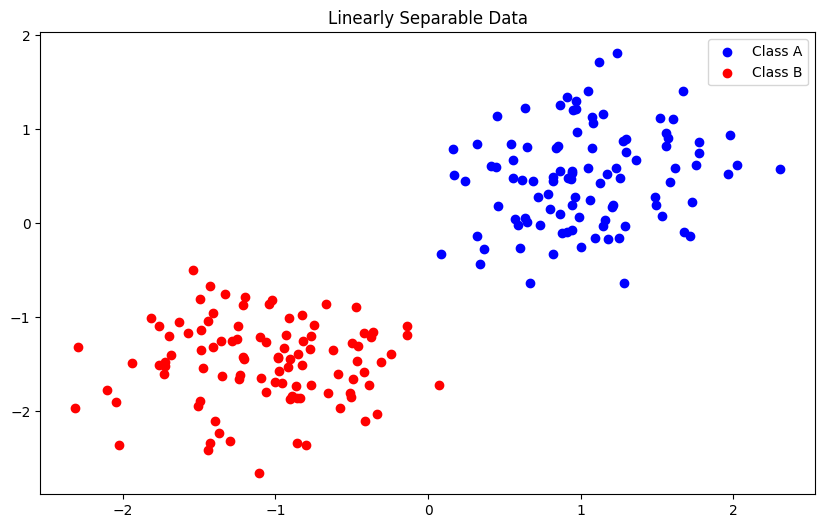

In [ ]:
# 3.1.1 Generate linearly separable data
print("3.1.1 Generating linearly separable data...")
X, y = generate_linearly_separable_data()
plt.figure(figsize=(10, 6))
plt.scatter(X[0, y == 1], X[1, y == 1], c='b', label='Class A')
plt.scatter(X[0, y == -1], X[1, y == -1], c='r', label='Class B')
plt.title("Linearly Separable Data")
plt.legend()
plt.show()

In [ ]:
class SingleLayerPerceptron:
    def __init__(self, input_dim, learning_rate=0.01, use_bias=True):
        self.use_bias = use_bias
        weight_dim = input_dim + 1 if use_bias else input_dim
        self.weights = np.random.randn(weight_dim) * 0.1
        self.learning_rate = learning_rate

    def add_bias(self, X):
        if self.use_bias:
            return np.vstack((X, np.ones(X.shape[1])))
        return X

    def predict(self, X):
        X_bias = self.add_bias(X)
        return np.sign(self.weights.dot(X_bias))

    def train_perceptron_sequential(self, X, y, epochs=20):
      """Perceptron learning rule in sequential mode with logging."""
      errors_history = []
      X_bias = self.add_bias(X)
      n_samples = X.shape[1]

      print("\nTraining Perceptron Sequential:")
      print(f"Initial Weights: {self.weights[:-1]}, Bias: {self.weights[-1]}")

      for epoch in range(epochs):
          errors = 0
          # Shuffle data for sequential learning
          indices = np.random.permutation(n_samples)
          X_shuffled = X_bias[:, indices]
          y_shuffled = y[indices]

          for i in range(n_samples):
              xi = X_shuffled[:, i:i+1]
              yi = y_shuffled[i]

            # Update weights only if misclassified
              output = np.sign(self.weights.dot(xi))
              if output != yi:
                  self.weights += self.learning_rate * yi * xi.flatten()
                  errors += 1

          error_rate = errors / n_samples
          errors_history.append(error_rate)

        # Log weights, bias, and error rate
          print(f"Epoch {epoch + 1}: Weights = {self.weights[:-1]}, Bias = {self.weights[-1]}, Error Rate = {error_rate}")

      return errors_history

    def train_delta_sequential(self, X, y, epochs=20):
      """Delta rule in sequential mode with logging."""
      errors_history = []
      mse_history = []
      X_bias = self.add_bias(X)
      n_samples = X.shape[1]

      print("\nTraining Delta Sequential:")
      print(f"Initial Weights: {self.weights[:-1]}, Bias: {self.weights[-1]}")

      for epoch in range(epochs):
          errors = 0
          squared_error = 0

        # Shuffle data
          indices = np.random.permutation(n_samples)
          X_shuffled = X_bias[:, indices]
          y_shuffled = y[indices]

          for i in range(n_samples):
              xi = X_shuffled[:, i:i+1]
              yi = y_shuffled[i]

            # Compute output and error
              output = self.weights.dot(xi)
              error = yi - output

            # Update weights
              self.weights += self.learning_rate * error * xi.flatten()

            # Track errors
              if np.sign(output) != yi:
                  errors += 1
              squared_error += error ** 2

          error_rate = errors / n_samples
          mse = squared_error / n_samples
          errors_history.append(error_rate)
          mse_history.append(mse)

        # Log weights, bias, error rate, and MSE
          print(f"Epoch {epoch + 1}: Weights = {self.weights[:-1]}, Bias = {self.weights[-1]}, Error Rate = {error_rate}, MSE = {mse}")

      return errors_history, mse_history


    def train_delta_batch(self, X, y, epochs=20):
        """Delta rule in batch mode"""
        errors_history = []
        mse_history = []
        X_bias = self.add_bias(X)
        n_samples = X.shape[1]

        for _ in range(epochs):
            # Compute outputs and errors
            outputs = self.weights.dot(X_bias)
            errors = y - outputs
            predictions = np.sign(outputs)

            # Update weights
            delta_w = self.learning_rate * errors.dot(X_bias.T) / n_samples
            self.weights += delta_w

            # Track errors
            misclassification = np.mean(predictions != y)
            mse = np.mean(errors ** 2)

            errors_history.append(misclassification)
            mse_history.append(mse)

        return errors_history, mse_history

    def train_delta_minibatch(self, X, y, epochs=20, batch_size=20):
      """Delta rule in mini-batch mode"""
      errors_history = []
      mse_history = []
      X_bias = self.add_bias(X)
      n_samples = X.shape[1]

      for epoch in range(epochs):
          errors = 0
          squared_error = 0

          # Shuffle data
          indices = np.random.permutation(n_samples)
          X_shuffled = X_bias[:, indices]
          y_shuffled = y[indices]

          # Process the data in mini-batches
          for start in range(0, n_samples, batch_size):
              end = min(start + batch_size, n_samples)
              X_mini_batch = X_shuffled[:, start:end]
              y_mini_batch = y_shuffled[start:end]

              # Compute output for the mini-batch
              outputs = self.weights.dot(X_mini_batch)

              # Calculate errors for the mini-batch
              errors_batch = y_mini_batch - outputs

              # Update weights based on the mini-batch error
              weight_updates = self.learning_rate * (errors_batch.dot(X_mini_batch.T) / (end - start))
              self.weights += weight_updates.flatten()

              # Track errors
              errors += np.sum(np.sign(outputs) != y_mini_batch)
              squared_error += np.sum(errors_batch ** 2)

          errors_history.append(errors / n_samples)
          mse_history.append(squared_error / n_samples)

      return errors_history, mse_history

    def test_by_class(self, X, y):
      """Calculate accuracy of each class separately."""
      # Add bias if used
      X_bias = self.add_bias(X)
      predictions = self.predict(X)  # Get predictions

      # Initialize counts
      class_counts = {1: {'true_positive': 0, 'false_negative': 0},
                      -1: {'true_positive': 0, 'false_negative': 0}}

      # Count true positives and false negatives for each class
      for i in range(y.shape[0]):
          if predictions[i] == y[i]:
              # Correctly predicted
              class_counts[y[i]]['true_positive'] += 1
          else:
              # Incorrectly predicted (false negative)
              class_counts[y[i]]['false_negative'] += 1

      # Calculate accuracies
      accuracies = {}
      for label in class_counts:
          true_positive = class_counts[label]['true_positive']
          false_negative = class_counts[label]['false_negative']
          total = true_positive + false_negative  # Total samples for this class

          if total > 0:  # To avoid division by zero
              accuracies[label] = true_positive / total
          else:
              accuracies[label] = 0  # If no samples for this class

      return accuracies

    def test_by_class(self, X, y):
      """Calculate accuracy of each class (1 and -1) separately."""
      # Add bias if used
      X_bias = self.add_bias(X)
      predictions = self.predict(X)  # Get predictions

      # Initialize counts for class 1 and class -1
      tp_class_1 = 0  # True positives for class 1
      fn_class_1 = 0  # False negatives for class 1 (1 predicted as -1)

      tp_class_n1 = 0  # True positives for class -1
      fn_class_n1 = 0  # False negatives for class -1 (-1 predicted as 1)

      # Count true positives and false negatives for each class
      for i in range(y.shape[0]):
          if predictions[i] == 1 and y[i] == 1:
              tp_class_1 += 1  # Correctly predicted class 1
          elif predictions[i] == -1 and y[i] == -1:
              tp_class_n1 += 1  # Correctly predicted class -1
          elif predictions[i] == -1 and y[i] == 1:
              fn_class_1 += 1  # Incorrectly predicted class 1
          elif predictions[i] == 1 and y[i] == -1:
              fn_class_n1 += 1  # Incorrectly predicted class -1

      # Calculate accuracies
      accuracy_class_pos = tp_class_1 / (tp_class_1 + fn_class_1) if (tp_class_1 + fn_class_1) > 0 else 0
      accuracy_class_neg = tp_class_n1 / (tp_class_n1 + fn_class_n1) if (tp_class_n1 + fn_class_n1) > 0 else 0

      return accuracy_class_pos, accuracy_class_neg

In [ ]:
def plot_data_and_boundary(X, y, perceptron, title="Decision Boundary"):
    """Plot data points and decision boundary with weights and bias"""
    plt.figure(figsize=(10, 6))

    # Plot data points
    plt.scatter(X[0, y == 1], X[1, y == 1], c='b', label='Class A')
    plt.scatter(X[0, y == -1], X[1, y == -1], c='r', label='Class B')

    # Plot decision boundary
    x_min, x_max = X[0].min() - 1, X[0].max() + 1
    y_min, y_max = X[1].min() - 1, X[1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    grid = np.c_[xx.ravel(), yy.ravel()].T
    Z = perceptron.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles='--')

    # Display weights and bias on the plot
    weights = perceptron.weights[:-1]
    bias = perceptron.weights[-1] if perceptron.use_bias else 0
    equation = f"Decision Boundary: {weights[0]:.2f} * x1 + {weights[1]:.2f} * x2 + {bias:.2f} = 0"
    plt.text(x_min + 0.5, y_max - 0.5, equation, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.legend()
    plt.show()



3.1.2 Running classification experiments...

Training Perceptron Sequential:
Initial Weights: [-0.07701727  0.02653251], Bias: 0.07320054818720295
Epoch 1: Weights = [0.01652362 0.0817316 ], Bias = 0.053200548187202955, Error Rate = 0.03
Epoch 2: Weights = [0.01652362 0.0817316 ], Bias = 0.053200548187202955, Error Rate = 0.0
Epoch 3: Weights = [0.01652362 0.0817316 ], Bias = 0.053200548187202955, Error Rate = 0.0
Epoch 4: Weights = [0.01652362 0.0817316 ], Bias = 0.053200548187202955, Error Rate = 0.0
Epoch 5: Weights = [0.01652362 0.0817316 ], Bias = 0.053200548187202955, Error Rate = 0.0
Epoch 6: Weights = [0.01652362 0.0817316 ], Bias = 0.053200548187202955, Error Rate = 0.0
Epoch 7: Weights = [0.01652362 0.0817316 ], Bias = 0.053200548187202955, Error Rate = 0.0
Epoch 8: Weights = [0.01652362 0.0817316 ], Bias = 0.053200548187202955, Error Rate = 0.0
Epoch 9: Weights = [0.01652362 0.0817316 ], Bias = 0.053200548187202955, Error Rate = 0.0
Epoch 10: Weights = [0.01652362 0.0817316

<Figure size 800x600 with 0 Axes>

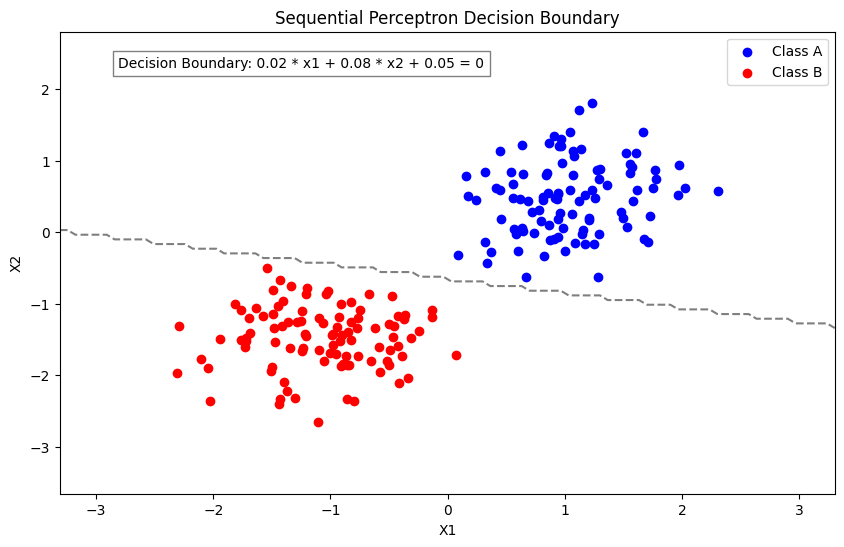

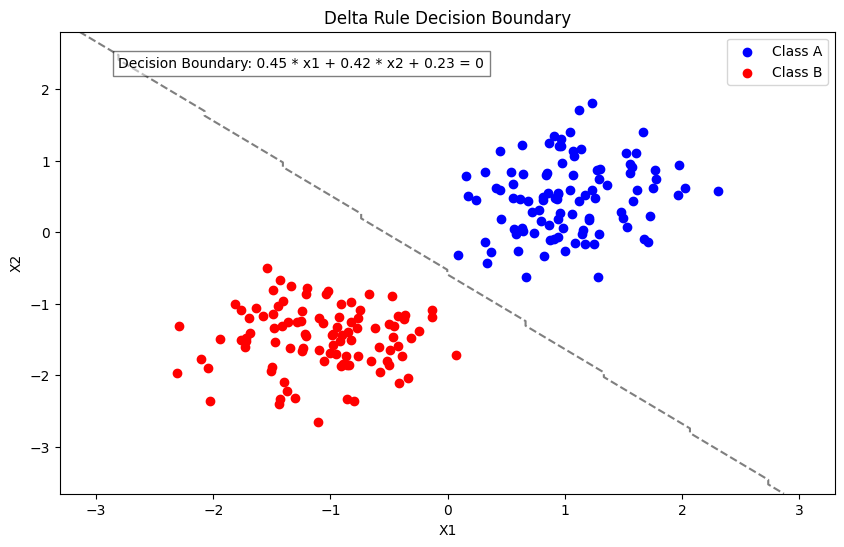

In [ ]:
# 3.1.2 Classification experiments with integrated logging and plotting
print("\n3.1.2 Running classification experiments...")

# Initialize models
perceptron_seq = SingleLayerPerceptron(2, learning_rate=0.01)
delta_seq = SingleLayerPerceptron(2, learning_rate=0.01)

# Train models (logging is already included in these methods)
perceptron_errors = perceptron_seq.train_perceptron_sequential(X, y)
delta_errors, delta_mse = delta_seq.train_delta_sequential(X, y)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plot_data_and_boundary(X, y, perceptron_seq, "Sequential Perceptron Decision Boundary")
plot_data_and_boundary(X, y, delta_seq, "Delta Rule Decision Boundary")
plt.show()



Training with learning rate: 0.2

Training Perceptron Sequential:
Initial Weights: [ 0.14121505 -0.09176494], Bias: -0.014370234492426168
Epoch 1: Weights = [0.35211048 0.22740117], Bias = 0.18562976550757385, Error Rate = 0.015
Epoch 2: Weights = [0.35211048 0.22740117], Bias = 0.18562976550757385, Error Rate = 0.0
Epoch 3: Weights = [0.35211048 0.22740117], Bias = 0.18562976550757385, Error Rate = 0.0
Epoch 4: Weights = [0.35211048 0.22740117], Bias = 0.18562976550757385, Error Rate = 0.0
Epoch 5: Weights = [0.35211048 0.22740117], Bias = 0.18562976550757385, Error Rate = 0.0
Epoch 6: Weights = [0.35211048 0.22740117], Bias = 0.18562976550757385, Error Rate = 0.0
Epoch 7: Weights = [0.35211048 0.22740117], Bias = 0.18562976550757385, Error Rate = 0.0
Epoch 8: Weights = [0.35211048 0.22740117], Bias = 0.18562976550757385, Error Rate = 0.0
Epoch 9: Weights = [0.35211048 0.22740117], Bias = 0.18562976550757385, Error Rate = 0.0
Epoch 10: Weights = [0.35211048 0.22740117], Bias = 0.1856

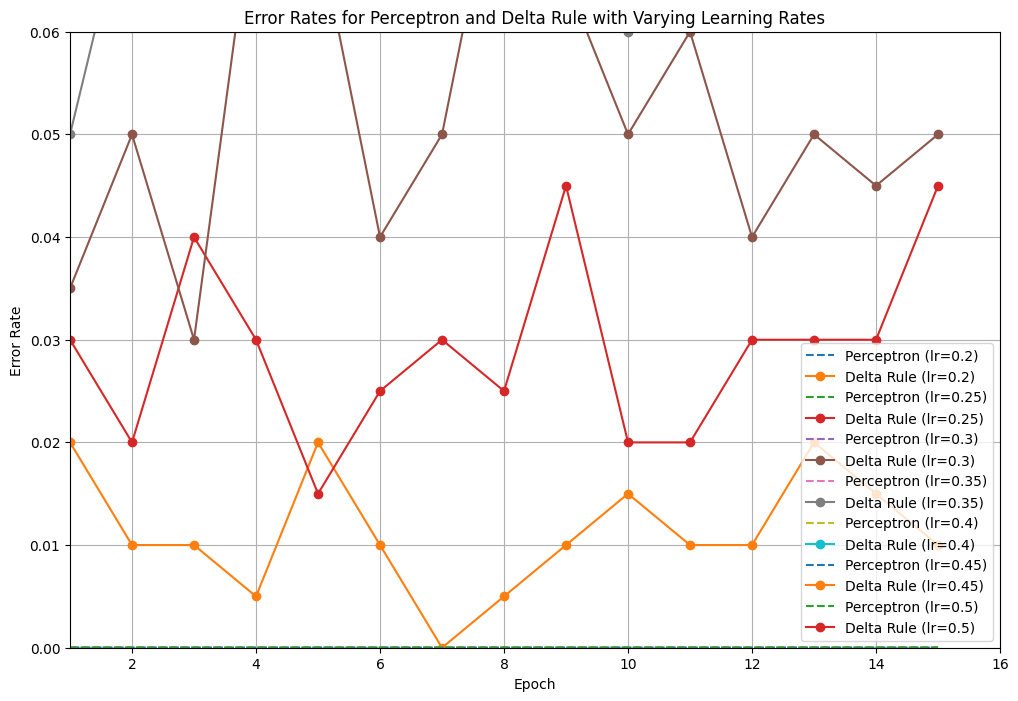

In [ ]:
# Define a range of learning rates to test
learning_rates = [ 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
n_epochs = 16  # Set a number of epochs for convergence study

# Create a figure for plotting
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    # Initialize the perceptron and delta rule models with the current learning rate
    perceptron_seq = SingleLayerPerceptron(2, learning_rate=lr)
    delta_seq = SingleLayerPerceptron(2, learning_rate=lr)

    # Train both models
    perceptron_errors = perceptron_seq.train_perceptron_sequential(X, y, epochs=n_epochs)
    delta_errors, delta_mse = delta_seq.train_delta_sequential(X, y, epochs=n_epochs)

    # Logging is already integrated into train_perceptron_sequential and train_delta_sequential
    # No need for additional logging functions

    # Plotting the results
    plt.plot(perceptron_errors, label=f'Perceptron (lr={lr})', linestyle='--')
    plt.plot(delta_errors, label=f'Delta Rule (lr={lr})', marker='o')

# Set plot title and labels
plt.title('Error Rates for Perceptron and Delta Rule with Varying Learning Rates')
plt.xlabel('Epoch')
plt.xlim(1, n_epochs)
plt.ylabel('Error Rate')
plt.ylim(0, 0.06)
plt.legend()
plt.grid()
plt.show()



Training with learning rate: 0.005

Training Perceptron Sequential:
Initial Weights: [0.00972254 0.05365754], Bias: 0.005534288148165316
Epoch 1: Weights = [0.02248668 0.04601922], Bias = 0.020534288148165318, Error Rate = 0.015
Epoch 2: Weights = [0.02248668 0.04601922], Bias = 0.020534288148165318, Error Rate = 0.0
Epoch 3: Weights = [0.02248668 0.04601922], Bias = 0.020534288148165318, Error Rate = 0.0
Epoch 4: Weights = [0.02248668 0.04601922], Bias = 0.020534288148165318, Error Rate = 0.0
Epoch 5: Weights = [0.02248668 0.04601922], Bias = 0.020534288148165318, Error Rate = 0.0
Epoch 6: Weights = [0.02248668 0.04601922], Bias = 0.020534288148165318, Error Rate = 0.0
Epoch 7: Weights = [0.02248668 0.04601922], Bias = 0.020534288148165318, Error Rate = 0.0
Epoch 8: Weights = [0.02248668 0.04601922], Bias = 0.020534288148165318, Error Rate = 0.0
Epoch 9: Weights = [0.02248668 0.04601922], Bias = 0.020534288148165318, Error Rate = 0.0
Epoch 10: Weights = [0.02248668 0.04601922], Bias 

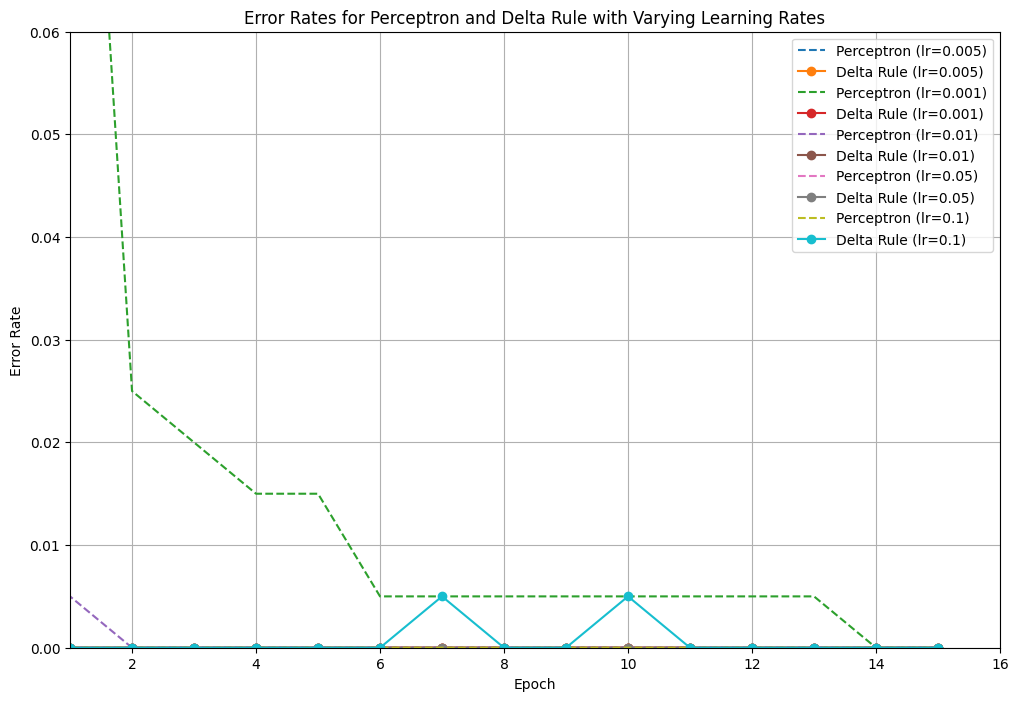

In [ ]:
# Define a range of learning rates to test
learning_rates = [0.005, 0.001, 0.01, 0.05, 0.1]
n_epochs = 16  # Set a number of epochs for convergence study

# Create a figure for plotting
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    # Initialize the perceptron and delta rule models with the current learning rate
    perceptron_seq = SingleLayerPerceptron(2, learning_rate=lr)
    delta_seq = SingleLayerPerceptron(2, learning_rate=lr)

    # Train both models
    perceptron_errors = perceptron_seq.train_perceptron_sequential(X, y, epochs=n_epochs)
    delta_errors, delta_mse = delta_seq.train_delta_sequential(X, y, epochs=n_epochs)

    # Logging is already integrated into train_perceptron_sequential and train_delta_sequential
    # No need for additional logging functions

    # Plotting the results
    plt.plot(perceptron_errors, label=f'Perceptron (lr={lr})', linestyle='--')
    plt.plot(delta_errors, label=f'Delta Rule (lr={lr})', marker='o')

# Set plot title and labels
plt.title('Error Rates for Perceptron and Delta Rule with Varying Learning Rates')
plt.xlabel('Epoch')
plt.xlim(1, n_epochs)
plt.ylabel('Error Rate')
plt.ylim(0, 0.06)
plt.legend()
plt.grid()
plt.show()



Comparing sequential vs batch delta rule...

Training with learning rate: 0.005

Training Delta Sequential:
Initial Weights: [-0.12080082  0.03336951], Bias: -0.2272597176473383
Epoch 1: Weights = [0.38098155 0.36844711], Bias = 0.017729098330669137, Error Rate = 0.145, MSE = [0.42226455]
Epoch 2: Weights = [0.4613928 0.3917101], Bias = 0.13075281815486098, Error Rate = 0.005, MSE = [0.12960554]
Epoch 3: Weights = [0.47646837 0.39591223], Bias = 0.17545217032796392, Error Rate = 0.0, MSE = [0.11271364]
Epoch 4: Weights = [0.46704338 0.38730496], Bias = 0.19751652074516107, Error Rate = 0.0, MSE = [0.11060931]
Epoch 5: Weights = [0.47811962 0.40435139], Bias = 0.20598914933477397, Error Rate = 0.0, MSE = [0.11015799]
Epoch 6: Weights = [0.46152202 0.39494034], Bias = 0.21248573893614536, Error Rate = 0.0, MSE = [0.10973604]
Epoch 7: Weights = [0.46949739 0.41305788], Bias = 0.20641109832611906, Error Rate = 0.0, MSE = [0.11001]
Epoch 8: Weights = [0.45761472 0.40712549], Bias = 0.20993

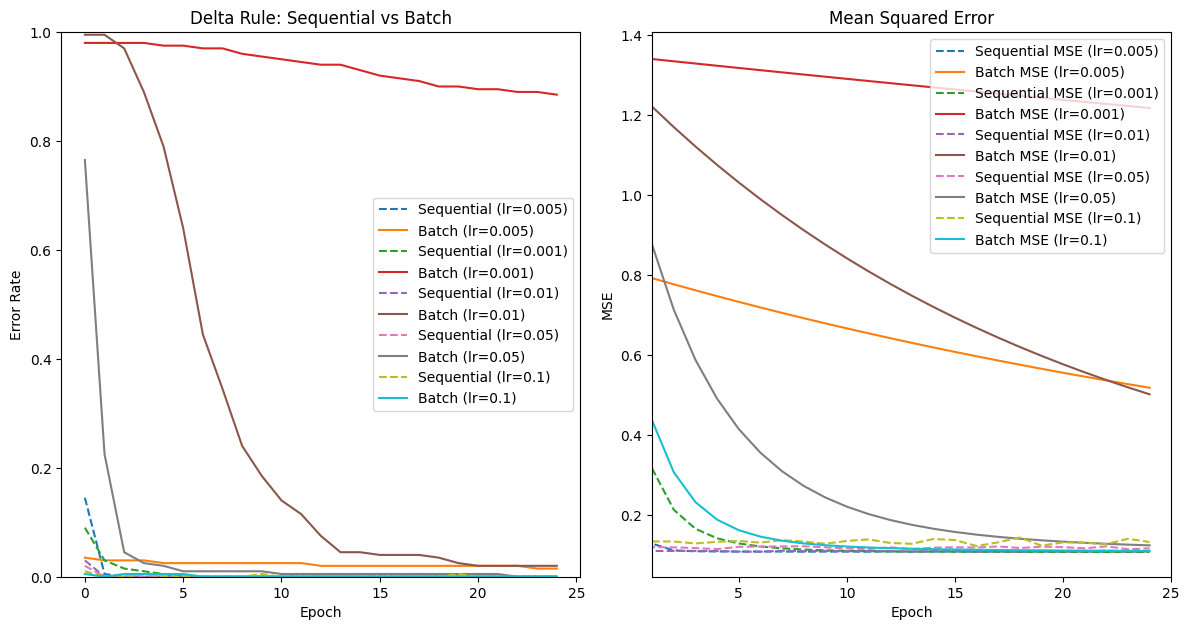

In [ ]:
# 2. Compare sequential vs batch delta rule
print("\nComparing sequential vs batch delta rule...")

# Define a range of learning rates to test
learning_rates = [0.005, 0.001, 0.01, 0.05, 0.1]
n_epochs = 25  # Set number of epochs for the comparison

# Create figure for plotting
plt.figure(figsize=(12, 12))

# Loop through each learning rate to train and compare the models
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    # Initialize the delta rule models with the current learning rate
    delta_seq = SingleLayerPerceptron(2, learning_rate=lr)
    delta_batch = SingleLayerPerceptron(2, learning_rate=lr)

    # Train both models
    delta_errors, delta_mse = delta_seq.train_delta_sequential(X, y, epochs=n_epochs)
    batch_errors, batch_mse = delta_batch.train_delta_batch(X, y, epochs=n_epochs)

    # Log weights, bias, error rates, and MSE
    print("\nSequential Training Logs:")
    for epoch, (errors, mse) in enumerate(zip(delta_errors, delta_mse), start=1):
        weights = delta_seq.weights[:-1] if delta_seq.use_bias else delta_seq.weights
        bias = delta_seq.weights[-1] if delta_seq.use_bias else 0
        print(f"Epoch {epoch}: Weights = {weights}, Bias = {bias}, Error Rate = {errors}, MSE = {mse}")

    print("\nBatch Training Logs:")
    for epoch, (errors, mse) in enumerate(zip(batch_errors, batch_mse), start=1):
        weights = delta_batch.weights[:-1] if delta_batch.use_bias else delta_batch.weights
        bias = delta_batch.weights[-1] if delta_batch.use_bias else 0
        print(f"Epoch {epoch}: Weights = {weights}, Bias = {bias}, Error Rate = {errors}, MSE = {mse}")

    # Plotting Errors
    plt.subplot(2, 2, 1)
    plt.plot(delta_errors, linestyle='--', label=f'Sequential (lr={lr})')  # Dashed line for Sequential
    plt.plot(batch_errors, label=f'Batch (lr={lr})')
    plt.title('Delta Rule: Sequential vs Batch')
    plt.xlabel('Epoch')
    plt.ylabel('Error Rate')
    plt.ylim(0, 1)
    plt.legend()

    # Plotting MSE
    plt.subplot(2, 2, 2)
    plt.plot(delta_mse, linestyle='--', label=f'Sequential MSE (lr={lr})')  # Dashed line for Sequential MSE
    plt.plot(batch_mse, label=f'Batch MSE (lr={lr})')
    plt.title('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.xlim(1, n_epochs)
    plt.ylabel('MSE')
    plt.legend()

# Show the plots
plt.tight_layout()
plt.show()



Comparing sequential vs batch delta rule...

Training with learning rate: 0.2

Training Delta Sequential:
Initial Weights: [ 0.11284376 -0.04826618], Bias: 0.00022156266324318427
Epoch 1: Weights = [0.31762184 0.56170913], Bias = 0.09404530956758252, Error Rate = 0.025, MSE = [0.19489707]
Epoch 2: Weights = [0.50647402 0.26059511], Bias = 0.3254662066447077, Error Rate = 0.0, MSE = [0.18070193]
Epoch 3: Weights = [0.5211024  0.59426666], Bias = 0.17885495333340024, Error Rate = 0.015, MSE = [0.16447093]
Epoch 4: Weights = [0.53286585 0.504495  ], Bias = 0.25047743855656823, Error Rate = 0.015, MSE = [0.19334383]
Epoch 5: Weights = [0.28100533 0.37822618], Bias = 0.34039204678348145, Error Rate = 0.015, MSE = [0.18562536]
Epoch 6: Weights = [0.52168524 0.31743017], Bias = 0.22197109025914152, Error Rate = 0.01, MSE = [0.18586264]
Epoch 7: Weights = [0.51036392 0.47963145], Bias = 0.432967271883287, Error Rate = 0.01, MSE = [0.16356545]
Epoch 8: Weights = [0.18515326 0.22005112], Bias =

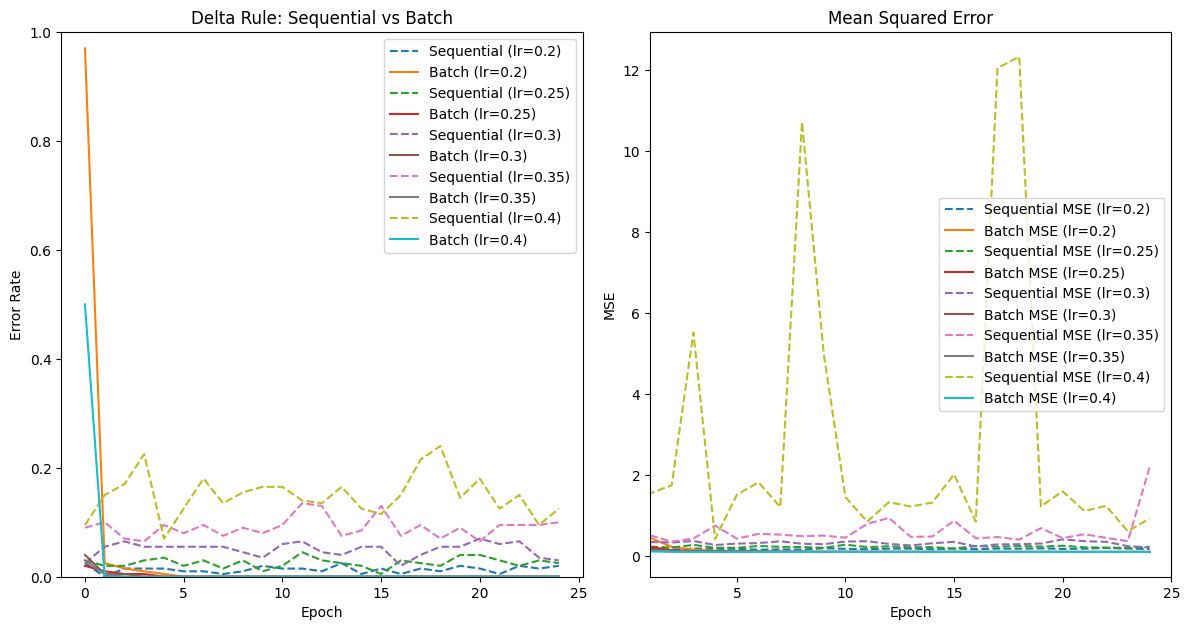

In [ ]:
# 2. Compare sequential vs batch delta rule
print("\nComparing sequential vs batch delta rule...")

# Define a range of learning rates to test
learning_rates = [ 0.2, 0.25, 0.3, 0.35, 0.4]
n_epochs = 25  # Set number of epochs for the comparison

# Create figure for plotting
plt.figure(figsize=(12, 12))

# Loop through each learning rate to train and compare the models
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    # Initialize the delta rule models with the current learning rate
    delta_seq = SingleLayerPerceptron(2, learning_rate=lr)
    delta_batch = SingleLayerPerceptron(2, learning_rate=lr)

    # Train both models
    delta_errors, delta_mse = delta_seq.train_delta_sequential(X, y, epochs=n_epochs)
    batch_errors, batch_mse = delta_batch.train_delta_batch(X, y, epochs=n_epochs)

    # Log weights, bias, error rates, and MSE
    print("\nSequential Training Logs:")
    for epoch, (errors, mse) in enumerate(zip(delta_errors, delta_mse), start=1):
        weights = delta_seq.weights[:-1] if delta_seq.use_bias else delta_seq.weights
        bias = delta_seq.weights[-1] if delta_seq.use_bias else 0
        print(f"Epoch {epoch}: Weights = {weights}, Bias = {bias}, Error Rate = {errors}, MSE = {mse}")

    print("\nBatch Training Logs:")
    for epoch, (errors, mse) in enumerate(zip(batch_errors, batch_mse), start=1):
        weights = delta_batch.weights[:-1] if delta_batch.use_bias else delta_batch.weights
        bias = delta_batch.weights[-1] if delta_batch.use_bias else 0
        print(f"Epoch {epoch}: Weights = {weights}, Bias = {bias}, Error Rate = {errors}, MSE = {mse}")

    # Plotting Errors
    plt.subplot(2, 2, 1)
    plt.plot(delta_errors, linestyle='--', label=f'Sequential (lr={lr})')  # Dashed line for Sequential
    plt.plot(batch_errors, label=f'Batch (lr={lr})')
    plt.title('Delta Rule: Sequential vs Batch')
    plt.xlabel('Epoch')
    plt.ylabel('Error Rate')
    plt.ylim(0, 1)
    plt.legend()

    # Plotting MSE
    plt.subplot(2, 2, 2)
    plt.plot(delta_mse, linestyle='--', label=f'Sequential MSE (lr={lr})')  # Dashed line for Sequential MSE
    plt.plot(batch_mse, label=f'Batch MSE (lr={lr})')
    plt.title('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.xlim(1, n_epochs)
    plt.ylabel('MSE')
    plt.legend()

# Show the plots
plt.tight_layout()
plt.show()



Testing perceptron with and without bias...


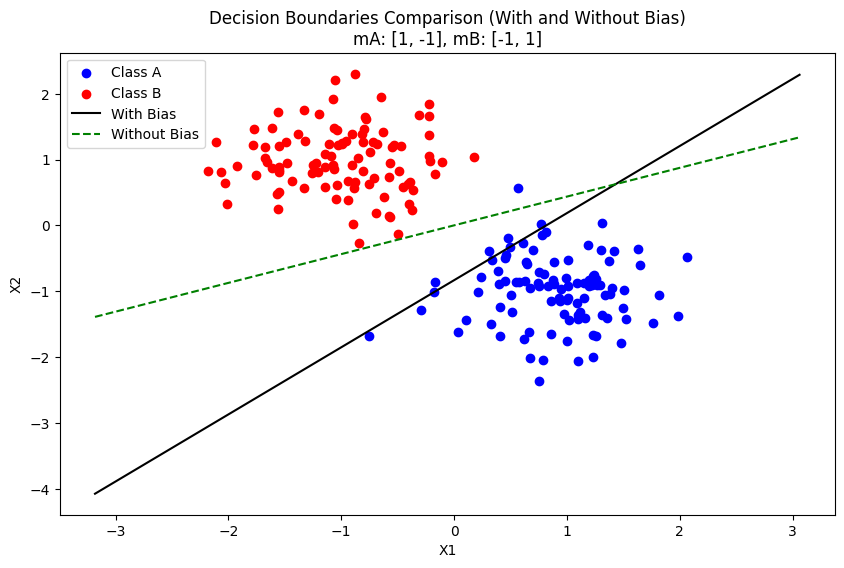

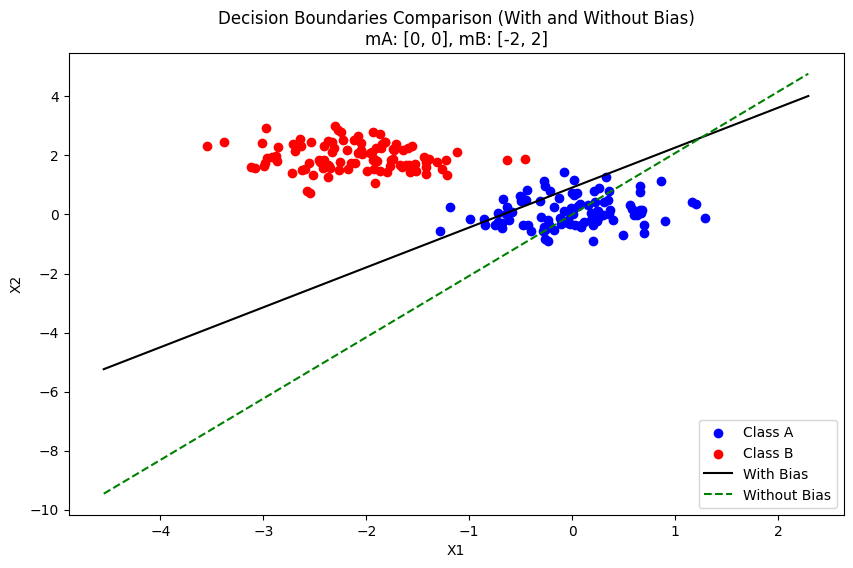

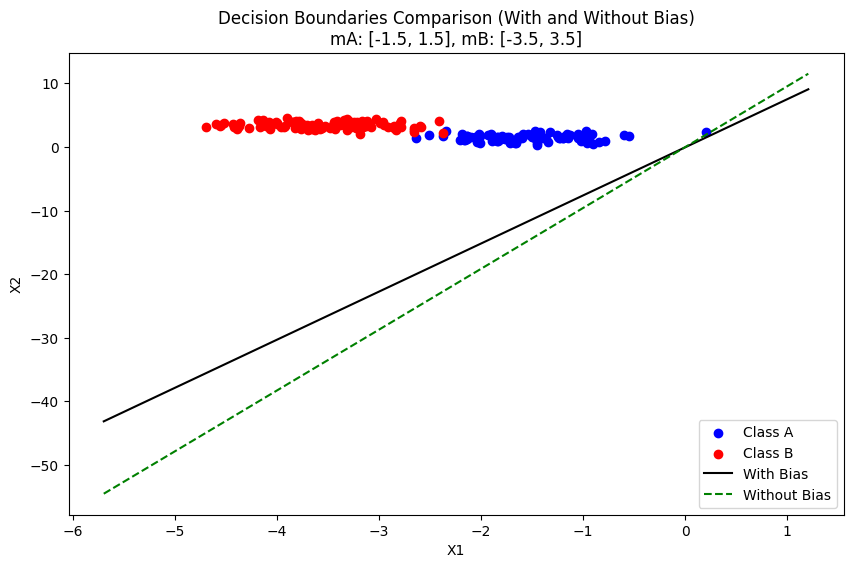

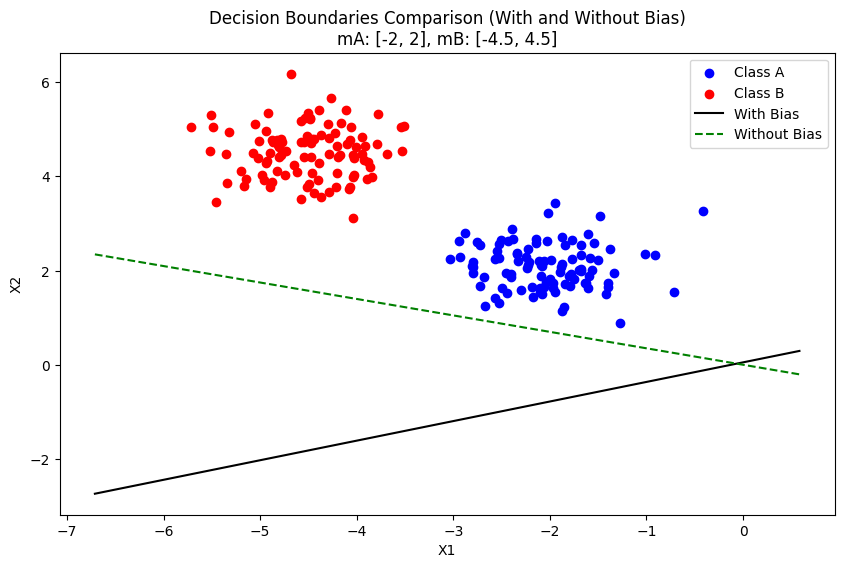

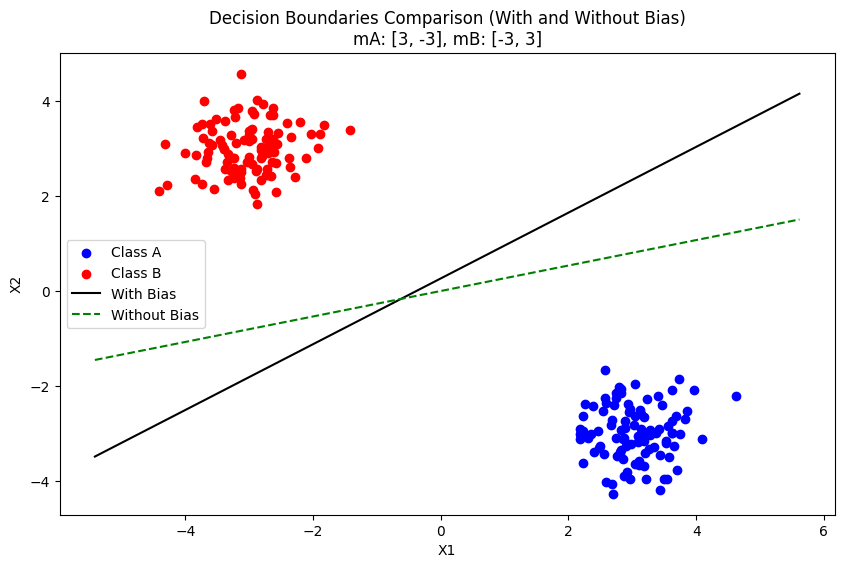

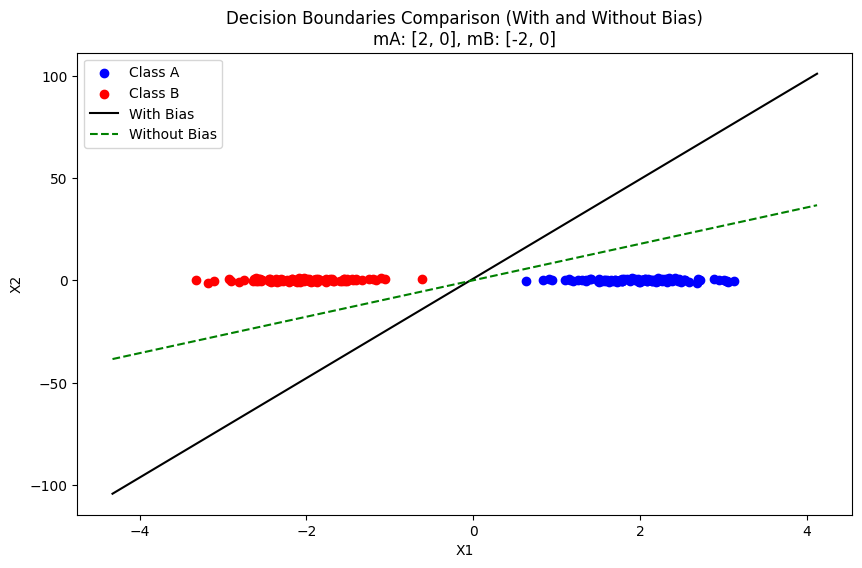

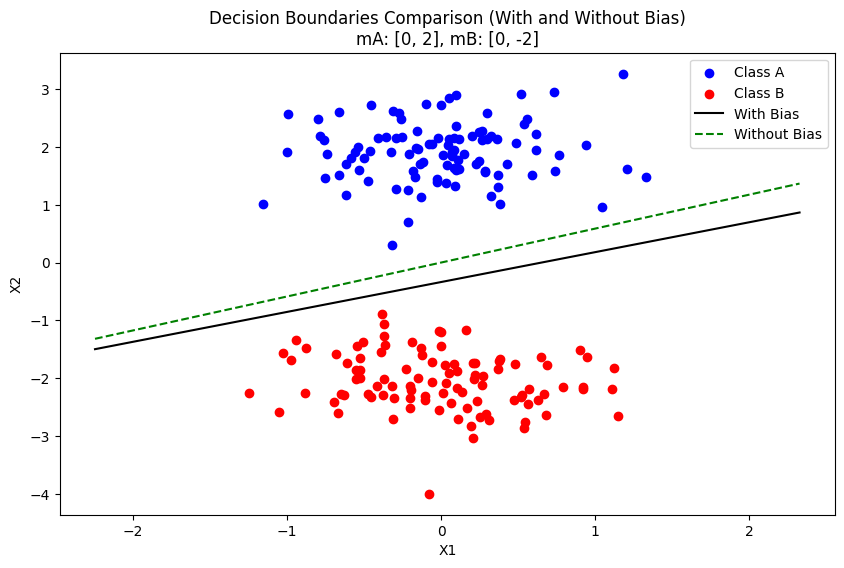

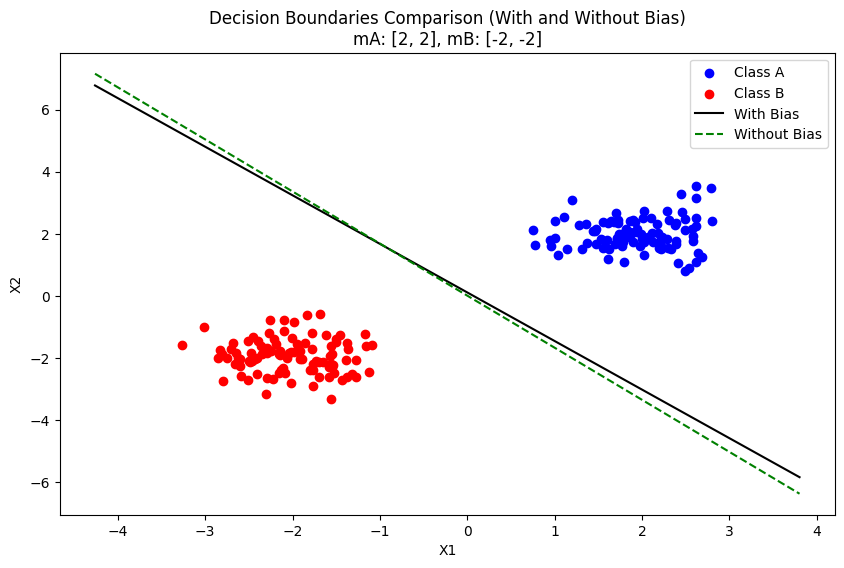

In [ ]:
# Testing perceptron with and without bias
print("\nTesting perceptron with and without bias...")

# Compare perceptrons with and without bias
def compare_bias_effects(X, y, mA, mB):
    # Perceptron with bias
    with_bias = SingleLayerPerceptron(input_dim=2, learning_rate=0.01, use_bias=True)
    with_bias.train_delta_batch(X, y)

    # Perceptron without bias
    no_bias = SingleLayerPerceptron(input_dim=2, learning_rate=0.01, use_bias=False)
    no_bias.train_delta_batch(X, y)

    # Plot data and decision boundaries
    plt.figure(figsize=(10, 6))

    # Plot data points
    plt.scatter(X[0, y == 1], X[1, y == 1], color='blue', label='Class A')
    plt.scatter(X[0, y == -1], X[1, y == -1], color='red', label='Class B')

    # Plot decision boundary for perceptron with bias
    weights_with_bias = with_bias.weights[:-1]  # Exclude bias
    bias_with_bias = with_bias.weights[-1]
    x_vals = np.linspace(X[0].min() - 1, X[0].max() + 1, 100)
    y_vals_with_bias = -(weights_with_bias[0] * x_vals + bias_with_bias) / weights_with_bias[1]
    plt.plot(x_vals, y_vals_with_bias, label="With Bias", color='black', linestyle='-')

    # Plot decision boundary for perceptron without bias
    weights_no_bias = no_bias.weights
    x_vals = np.linspace(X[0].min() - 1, X[0].max() + 1, 100)
    y_vals_no_bias = -(weights_no_bias[0] * x_vals) / weights_no_bias[1]
    plt.plot(x_vals, y_vals_no_bias, label="Without Bias", color='green', linestyle='--')

    plt.title(f"Decision Boundaries Comparison (With and Without Bias)\nmA: {mA}, mB: {mB}")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()

# Test cases with additional datasets
datasets = [
    ([1, -1], [-1, 1]),        # Simple, linearly separable dataset
    ([0, 0], [-2, 2]),         # Dataset centered on origin
    ([-1.5, 1.5], [-3.5, 3.5]), # Dataset farther from origin
    ([-2, 2], [-4.5, 4.5]),
    ([3, -3], [-3, 3]),        # High separation distance
    ([2, 0], [-2, 0]),         # Horizontal alignment
    ([0, 2], [0, -2]),         # Vertical alignment
    ([2, 2], [-2, -2])         # Diagonal alignment with equal centroids
]

# Generate data and compare decision boundaries
for mA, mB in datasets:
    X, y = generate_linearly_separable_data(mA=mA, mB=mB)
    compare_bias_effects(X, y, mA, mB)



Testing Perceptrons and Delta Rule on Non-Linearly Separable Data...

Training Perceptron Sequential:
Initial Weights: [ 0.00890033 -0.00280673], Bias: -0.04206299224864013
Epoch 1: Weights = [-0.00513743  0.04227155], Bias = 0.007937007751359875, Error Rate = 0.345
Epoch 2: Weights = [-0.00925462  0.03581062], Bias = 0.017937007751359875, Error Rate = 0.315
Epoch 3: Weights = [-0.00526698  0.04125814], Bias = 0.007937007751359875, Error Rate = 0.295
Epoch 4: Weights = [-0.00657142  0.03738297], Bias = -0.012062992248640126, Error Rate = 0.3
Epoch 5: Weights = [-0.00634355  0.0419464 ], Bias = -0.0020629922486401255, Error Rate = 0.355
Epoch 6: Weights = [-0.01378879  0.04770093], Bias = -0.0020629922486401255, Error Rate = 0.3
Epoch 7: Weights = [-0.00979224  0.04033154], Bias = -0.0020629922486401255, Error Rate = 0.28
Epoch 8: Weights = [-0.00314772  0.04098083], Bias = 0.007937007751359875, Error Rate = 0.295
Epoch 9: Weights = [-0.01071843  0.03758865], Bias = 0.00793700775135987

<Figure size 1200x800 with 0 Axes>

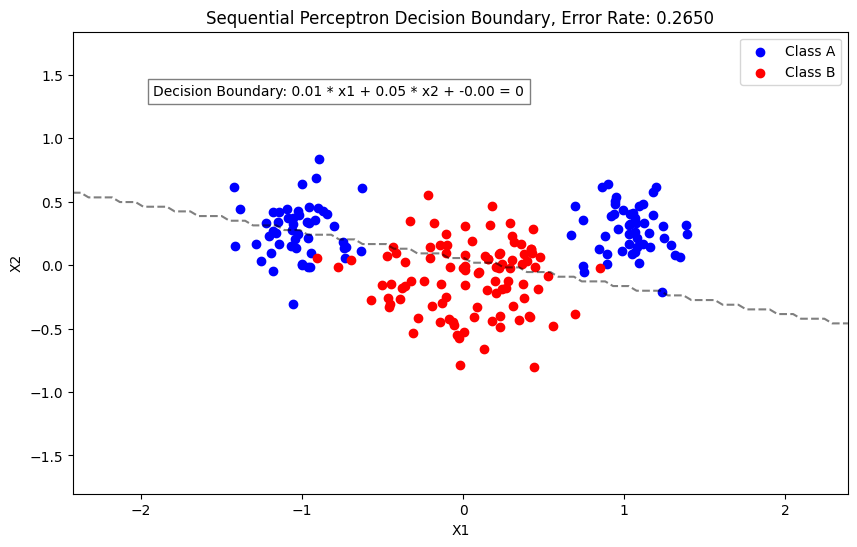

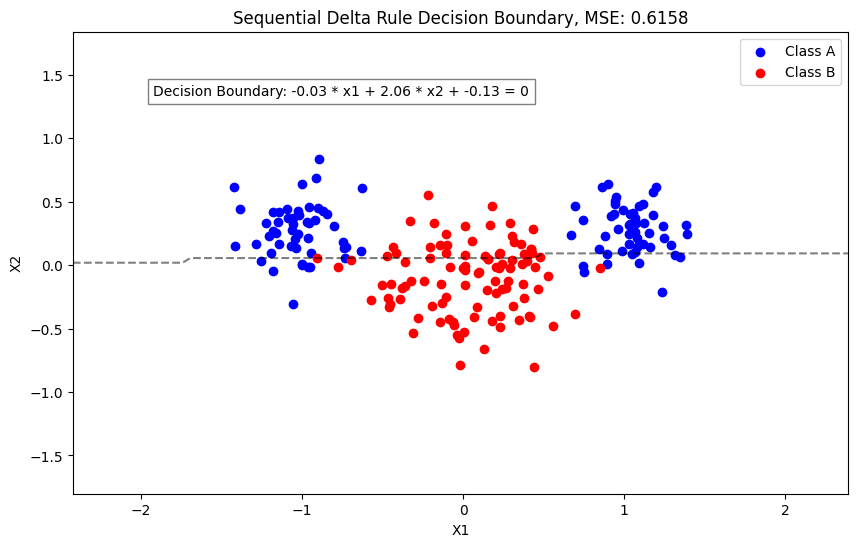

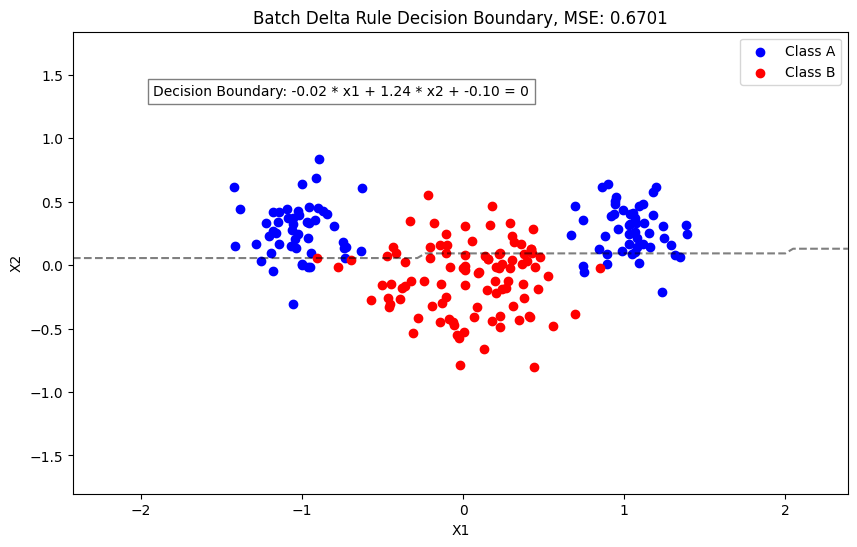

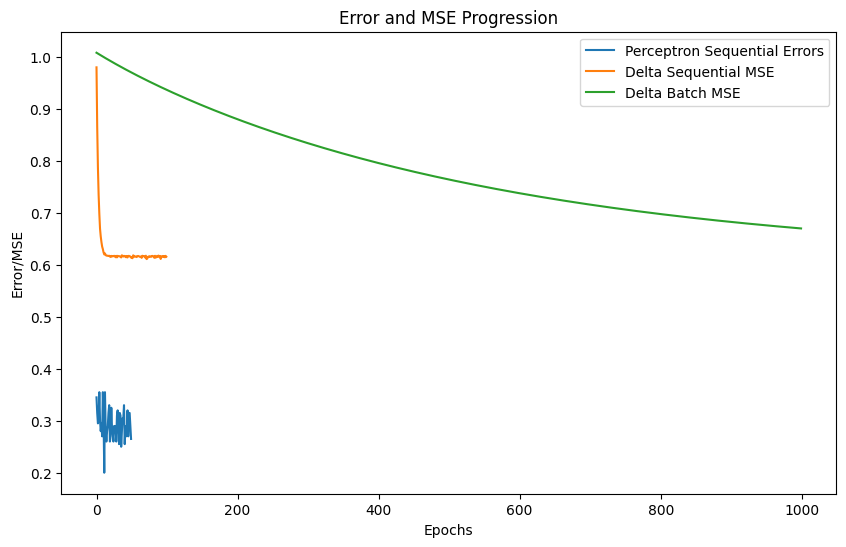

In [ ]:
def generate_nonseparable_data(n=100):
    """Generate non-linearly separable data as specified in the assignment"""
    mA = [1.0, 0.3]
    sigmaA = 0.2
    mB = [0.0, -0.1]
    sigmaB = 0.3

    # Generate class A with two clusters
    classA = np.zeros((2, n))
    half_n = round(0.5 * n)
    classA[0, :half_n] = np.random.randn(half_n) * sigmaA - mA[0]
    classA[0, half_n:] = np.random.randn(n - half_n) * sigmaA + mA[0]
    classA[1, :] = np.random.randn(n) * sigmaA + mA[1]

    # Generate class B
    classB = np.zeros((2, n))
    classB[0, :] = np.random.randn(n) * sigmaB + mB[0]
    classB[1, :] = np.random.randn(n) * sigmaB + mB[1]

    X = np.hstack((classA, classB))
    y = np.hstack((np.ones(n), -np.ones(n)))
    return X, y

# 3.1.3 Non-linearly separable data
# Generate and test non-linearly separable data
print("\nTesting Perceptrons and Delta Rule on Non-Linearly Separable Data...")
X_nonlin, y_nonlin = generate_nonseparable_data()

# Initialize models
perceptron_seq = SingleLayerPerceptron(2, learning_rate=0.01)
delta_seq = SingleLayerPerceptron(2, learning_rate=0.01)
delta_batch = SingleLayerPerceptron(2, learning_rate=0.01)

# Train models
perceptron_errors = perceptron_seq.train_perceptron_sequential(X_nonlin, y_nonlin, epochs=50)
delta_errors, delta_mse = delta_seq.train_delta_sequential(X_nonlin, y_nonlin, epochs=100)
batch_errors, batch_mse = delta_batch.train_delta_batch(X_nonlin, y_nonlin, epochs=1000)

# Print final error rates and MSE for verification
print(f"Perceptron Sequential Error Rate: {perceptron_errors[-1]:.4f}")
print(f"Delta Sequential Final MSE: {delta_mse[-1].item():.4f}")
print(f"Delta Batch Final MSE: {batch_mse[-1]:.4f}")

# Plot decision boundaries
plt.figure(figsize=(12, 8))
plot_data_and_boundary(X_nonlin, y_nonlin, perceptron_seq, f"Sequential Perceptron Decision Boundary, Error Rate: {perceptron_errors[-1]:.4f}")
plot_data_and_boundary(X_nonlin, y_nonlin, delta_seq, f"Sequential Delta Rule Decision Boundary, MSE: {delta_mse[-1].item():.4f}")
plot_data_and_boundary(X_nonlin, y_nonlin, delta_batch, f"Batch Delta Rule Decision Boundary, MSE: {batch_mse[-1].item():.4f}")
plt.show()

# Optional: Plot error and MSE progression
plt.figure(figsize=(10, 6))
plt.plot(perceptron_errors, label="Perceptron Sequential Errors")
plt.plot(delta_mse, label="Delta Sequential MSE")
plt.plot(batch_mse, label="Delta Batch MSE")
plt.xlabel("Epochs")
plt.ylabel("Error/MSE")
plt.title("Error and MSE Progression")
plt.legend()
plt.show()


In [ ]:
def subsample_data(X, y, scenario='original'):
    """Subsample data according to assignment scenarios"""
    n_samples = X.shape[1]
    mask = np.ones(n_samples, dtype=bool)
    if scenario == 'original':
      return X, y

    elif scenario == 'random_both':
        # Random 25% from each class
        for label in [1, -1]:
            class_indices = np.where(y == label)[0]
            remove_n = int(len(class_indices) * 0.25)
            remove_indices = np.random.choice(class_indices, size=remove_n, replace=False)
            mask[remove_indices] = False

    elif scenario == 'random_A':
        # Random 50% from class A
        class_A_indices = np.where(y == 1)[0]
        remove_n = int(len(class_A_indices) * 0.5)
        remove_indices = np.random.choice(class_A_indices, size=remove_n, replace=False)
        mask[remove_indices] = False

    elif scenario == 'random_B':
        # Random 50% from class B
        class_B_indices = np.where(y == -1)[0]
        remove_n = int(len(class_B_indices) * 0.5)
        remove_indices = np.random.choice(class_B_indices, size=remove_n, replace=False)
        mask[remove_indices] = False

    elif scenario == 'selective_A':
        # 20%/80% from left/right clusters of class A
        class_A_mask = (y == 1)
        left_cluster = (X[0] < 0) & class_A_mask
        right_cluster = (X[0] > 0) & class_A_mask

        left_indices = np.where(left_cluster)[0]
        right_indices = np.where(right_cluster)[0]

        remove_left = int(len(left_indices) * 0.2)
        remove_right = int(len(right_indices) * 0.8)

        remove_indices = np.concatenate([
            np.random.choice(left_indices, size=remove_left, replace=False),
            np.random.choice(right_indices, size=remove_right, replace=False)
        ])
        mask[remove_indices] = False

    return X[:, mask], y[mask]

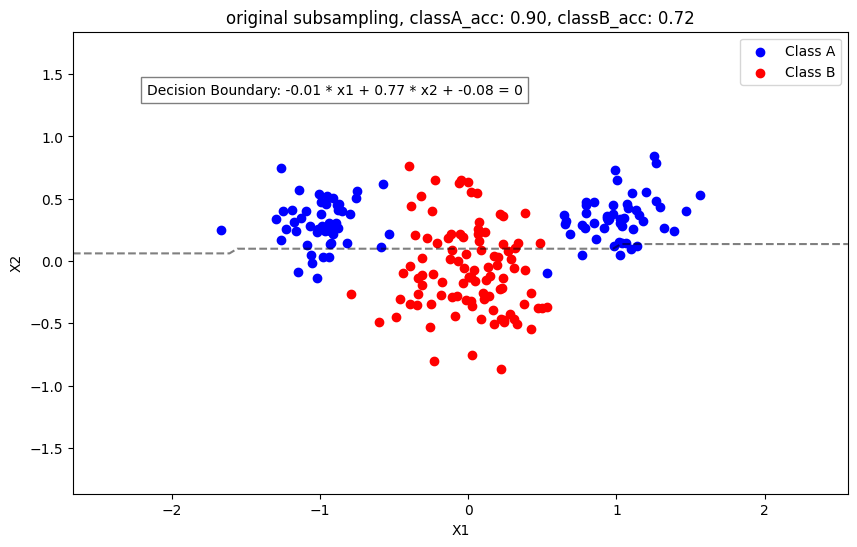

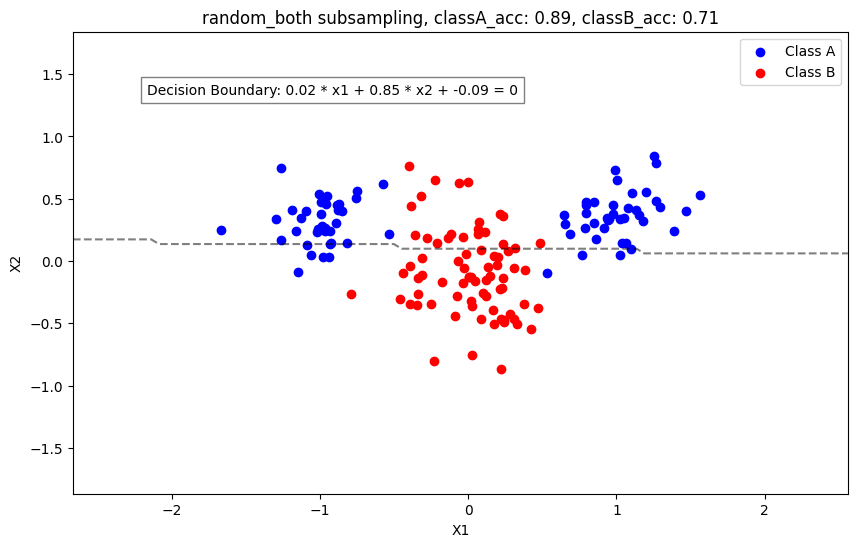

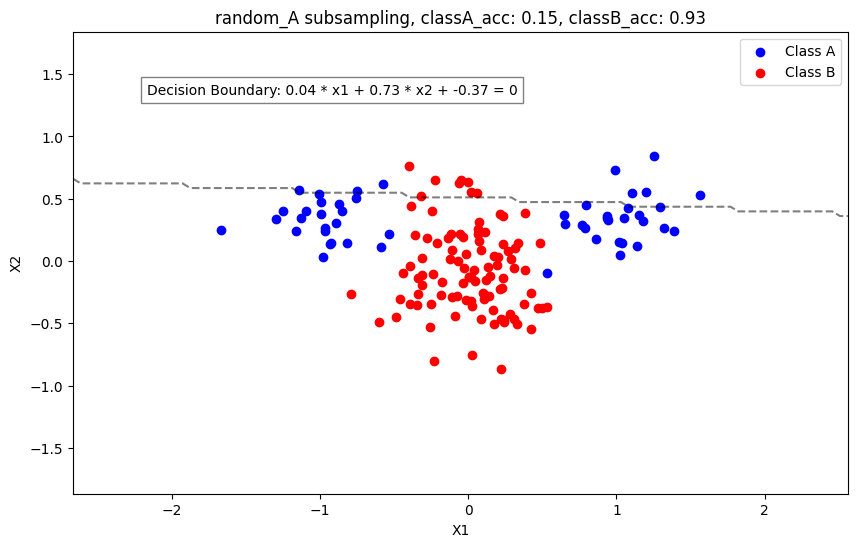

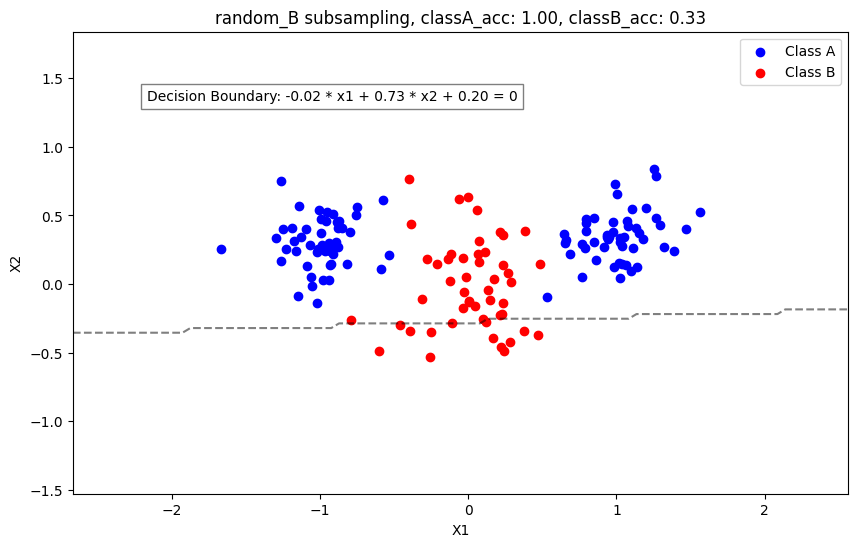

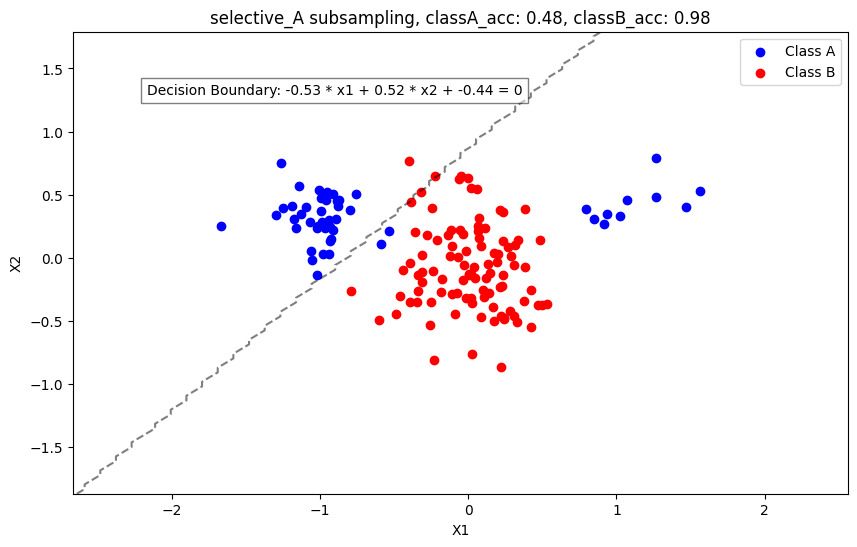

In [ ]:
# Test different subsampling scenarios
scenarios = ['original', 'random_both', 'random_A', 'random_B', 'selective_A']
for scenario in scenarios:
    X_sub, y_sub = subsample_data(X_nonlin, y_nonlin, scenario)
    perceptron = SingleLayerPerceptron(2, learning_rate=0.01)
    _, _ = perceptron.train_delta_batch(X_sub, y_sub, epochs=500)
    pos_acc, neg_acc = perceptron.test_by_class(X_nonlin, y_nonlin)
    plot_data_and_boundary(X_sub, y_sub, perceptron,
                          f"{scenario} subsampling, classA_acc: {pos_acc:.2f}, classB_acc: {neg_acc:.2f}")


Testing Subsampling Scenarios on Non-Linearly Separable Data...
Original Scenario - Class A Accuracy: 0.90, Class B Accuracy: 0.72


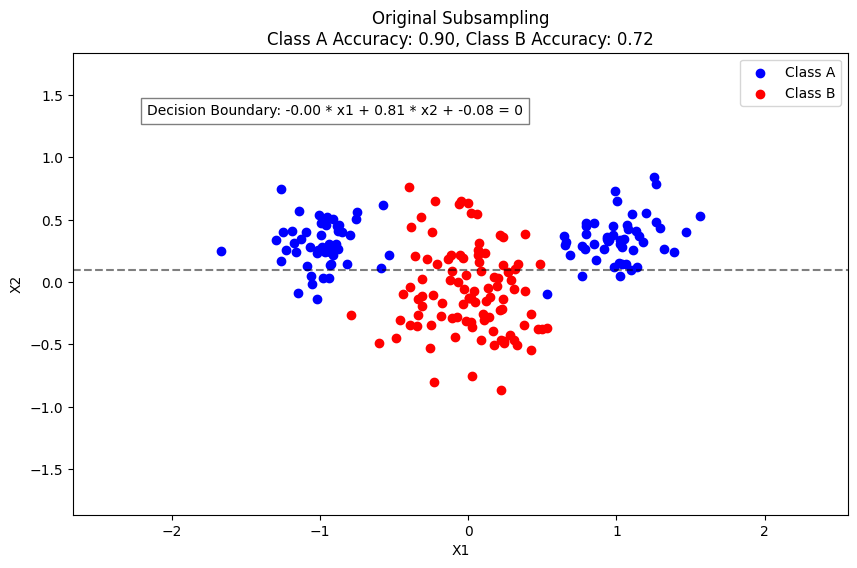

Random_both Scenario - Class A Accuracy: 0.88, Class B Accuracy: 0.72


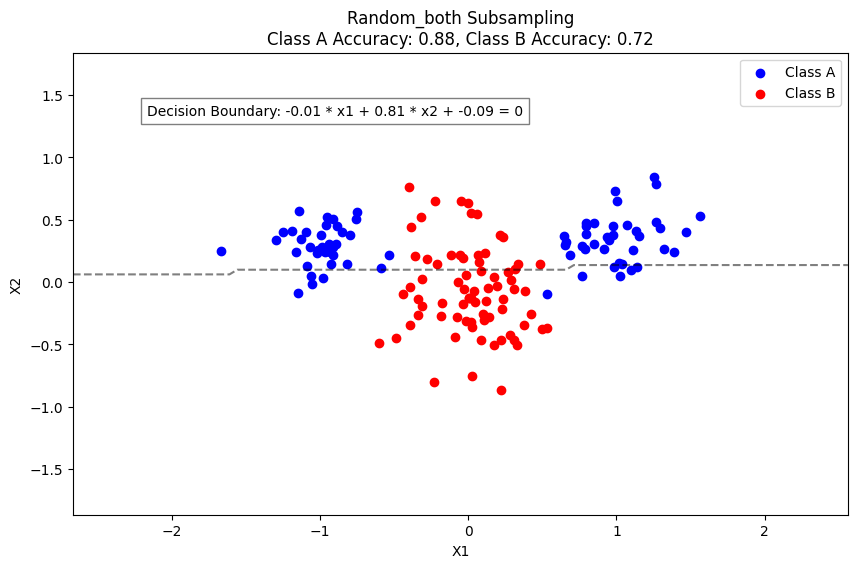

Random_a Scenario - Class A Accuracy: 0.16, Class B Accuracy: 0.95


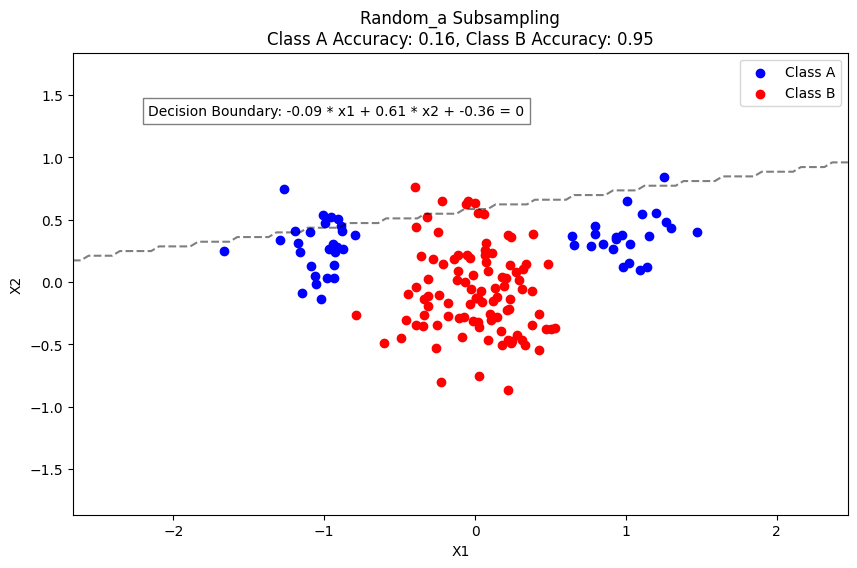

Random_b Scenario - Class A Accuracy: 1.00, Class B Accuracy: 0.28


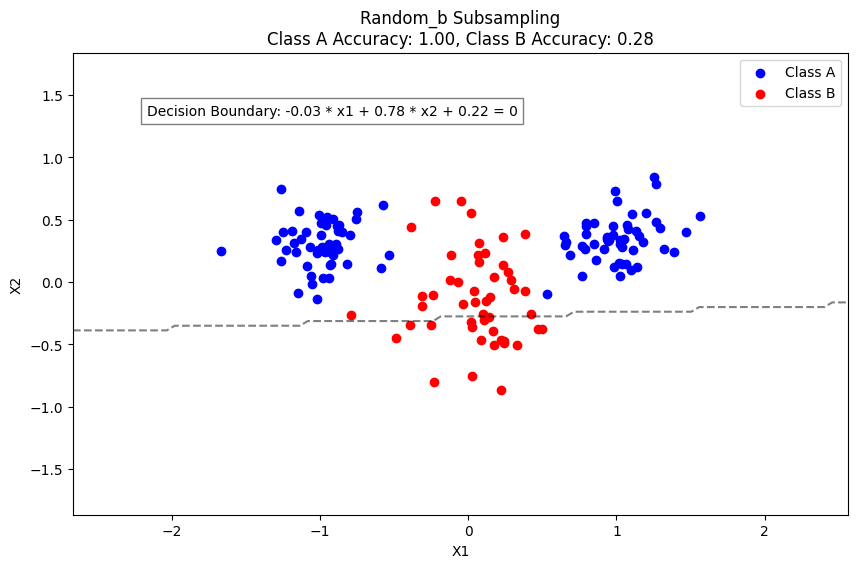

Selective_a Scenario - Class A Accuracy: 0.47, Class B Accuracy: 0.96


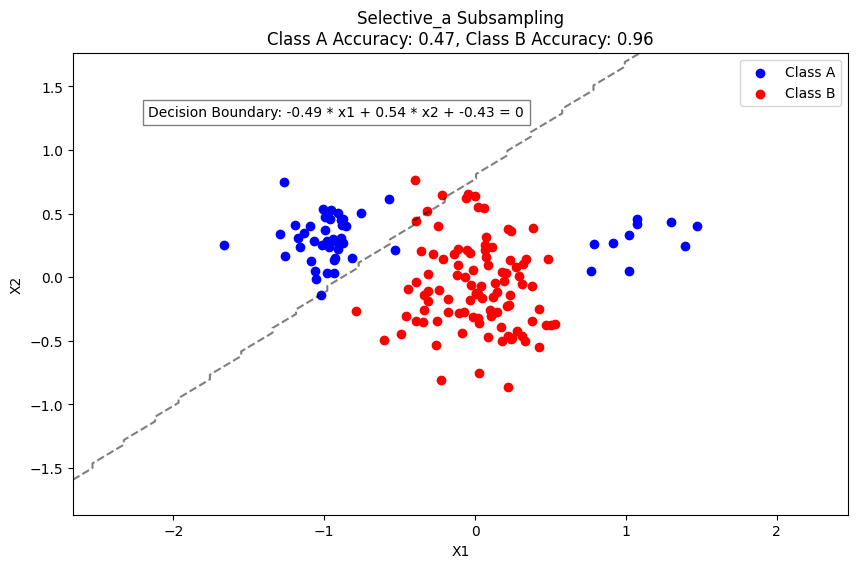

In [ ]:
# Test subsampling scenarios on non-linearly separable data
print("\nTesting Subsampling Scenarios on Non-Linearly Separable Data...")
scenarios = ['original', 'random_both', 'random_A', 'random_B', 'selective_A']

for scenario in scenarios:
    # Subsample data
    X_sub, y_sub = subsample_data(X_nonlin, y_nonlin, scenario)

    # Train perceptron model on subsampled data
    perceptron = SingleLayerPerceptron(2, learning_rate=0.01)
    _, _ = perceptron.train_delta_batch(X_sub, y_sub, epochs=500)

    # Test accuracy on the original dataset
    pos_acc, neg_acc = perceptron.test_by_class(X_nonlin, y_nonlin)

    # Print accuracy for each class
    print(f"{scenario.capitalize()} Scenario - Class A Accuracy: {pos_acc:.2f}, Class B Accuracy: {neg_acc:.2f}")

    # Plot decision boundary for subsampled data
    plot_data_and_boundary(X_sub, y_sub, perceptron,
                           f"{scenario.capitalize()} Subsampling\nClass A Accuracy: {pos_acc:.2f}, Class B Accuracy: {neg_acc:.2f}")
